In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

List of datasets in this file: 
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
Shape of X_train: 
 (42000, 32, 32)
Shape of y_train: 
 (42000,)
Shape of X_test: 
 (18000, 32, 32)
Shape of y_test: 
 (18000,)
Shape of X_val: 
 (60000, 32, 32)
Shape of y_val: 
 (60000,)


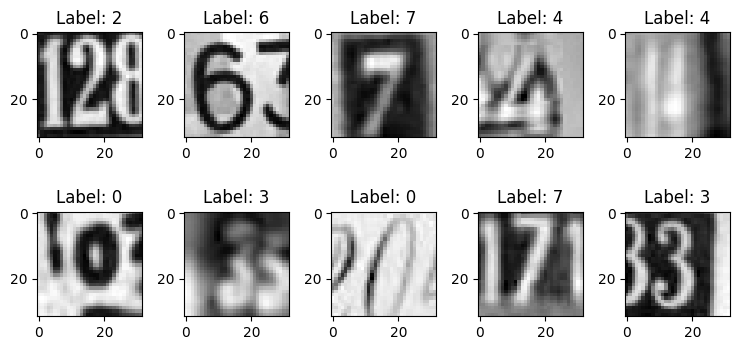

In [2]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Activation
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

import cv2
from PIL import Image


filepath = "/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5"
df = h5py.File(filepath, 'r')
dataframe = np.array(df)
ls = list(dataframe)
print("List of datasets in this file: \n", ls)

X_test = np.array(df['X_test'])
X_train = np.array(df['X_train'])
X_val = np.array(df['X_val'])

y_test = np.array(df['y_test'])
y_train = np.array(df['y_train'])
y_val = np.array(df['y_val'])
print("Shape of X_train: \n", X_train.shape)
print("Shape of y_train: \n", y_train.shape)
print("Shape of X_test: \n", X_test.shape)
print("Shape of y_test: \n", y_test.shape)
print("Shape of X_val: \n", X_val.shape)
print("Shape of y_val: \n", y_val.shape)


num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(10):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
    plt.tight_layout()

plt.show()



In [3]:

x_train = np.expand_dims(X_train, axis=-1)
x_train = x_train.astype('float32') / 255
x_val = np.expand_dims(X_val, axis=-1)
x_val = x_val.astype('float32') / 255
x_test = np.expand_dims(X_test, axis=-1)
x_test = x_test.astype('float32') / 255
print("Shape of x_train:", x_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of x_test:", x_test.shape)

y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
y_test = keras.utils.to_categorical(y_test)

print("Shape of ytrain:", y_train.shape)
print("Shape of yval:", y_val.shape)
print("Shape of ytest:", y_test.shape)

Shape of x_train: (42000, 32, 32, 1)
Shape of x_val: (60000, 32, 32, 1)
Shape of x_test: (18000, 32, 32, 1)
Shape of ytrain: (42000, 10)
Shape of yval: (60000, 10)
Shape of ytest: (18000, 10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        2

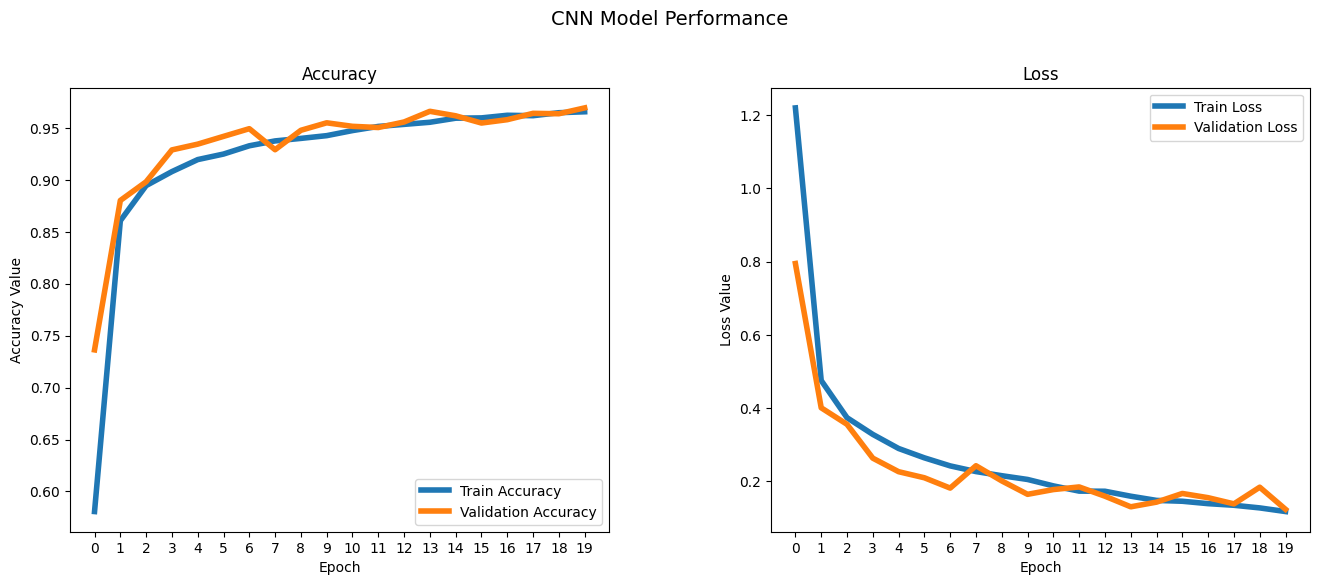

In [4]:

model2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(10, activation='softmax')
])
model2.summary()

model2.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

history2 = model2.fit(x=x_train, y=y_train,
                      validation_data=(x_val, y_val),
                      batch_size=32,
                      epochs=20,
                      verbose=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
title = fig.suptitle('CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0, 20))
ax1.plot(epoch_list, history2.history['accuracy'], label='Train Accuracy', linewidth=4)
ax1.plot(epoch_list, history2.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax1.set_xticks(np.arange(0, 20))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')

l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history2.history['loss'], label='Train Loss', linewidth=4)
ax2.plot(epoch_list, history2.history['val_loss'], label='Validation Loss', linewidth=4)
ax2.set_xticks(np.arange(0, 20))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

model2_scores = model2.evaluate(x_test, y_test)
print("TEST SET: %s: %.2f%%" % (model2.metrics_names[1], model2_scores[1] * 100))

model2.save('SVHN_Model_CNN.h5')

1/1 [==============================] - 0s 223ms/step
The predicted house number is: 3


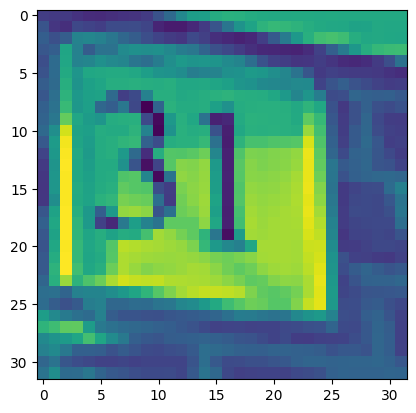

In [46]:

def predict_house_number(image_path, model_path='SVHN_Model_CNN.h5'):

    model = load_model(model_path)


    img = Image.open(image_path).convert('L')
    img = img.resize((32, 32))
    img_array = np.array(img)
    plt.imshow(img)
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = img_array.astype('float32') / 255
    img_array = np.expand_dims(img_array, axis=0)


    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    return predicted_class


image_path = '/content/drive/MyDrive/Colab Notebooks/photo9.PNG'
predicted_number = predict_house_number(image_path)
print(f'The predicted house number is: {predicted_number}')